In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reduced_mnist.csv to reduced_mnist.csv
User uploaded file "reduced_mnist.csv" with length 4610614 bytes


A small subset of MNIST dataset for handwritten digits has been used in this part for multiclass-classification. 

In the first cell, all relevant python modules have been imported.

In [0]:
## Data Preprocessing
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

## Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

## Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

## Visualisation
import matplotlib.pyplot as plt

**2.1 Read and understand the data, create a default One-vs-Rest Classifier**

*2.1(1) Use the data from the file reduced_mnist.csv in the data directory. Begin by reading the data. Print the following*
information:

*   Number of data points
*   Total number of features
*   Unique labels in the data*

In [5]:
##### 2.1 (1) #####

mnist = pd.read_csv("reduced_mnist.csv")
unique_labels = mnist['label'].nunique()
# We can see from the dataset all the feature columns starts with "pixel"
mnist_features = mnist.filter(regex= '^pixel', axis=1)
mnist_number_of_examples, mnist_number_of_features = mnist_features.shape
datapoints = mnist_number_of_examples * mnist_number_of_features
print(f"The number of examples in the dataset are: {mnist_number_of_examples}")
print(f"The number of features in the dataset are: {mnist_number_of_features}")
print(f"The number of datapoints are {datapoints}")
print(f"\nThe number of unique labels are: {unique_labels}")

The number of examples in the dataset are: 2520
The number of features in the dataset are: 784
The number of datapoints are 1975680

The number of unique labels are: 10


**Explanation:** 

We can see that the number of unique labels are more than 2, therefore it is a multiclass classification problem.

*2.1(2) Split the data into 70% training data and 30% test data. 
Fit a One-vs-Rest Classifier (which uses Logistic regression classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data.*

In [6]:
# Splitting the dataset i

mnist_train, mnist_test = train_test_split(mnist, test_size=0.3, 
                                           random_state = 2018)

# Splitting train and test

mnist_train_X = mnist_train.iloc[:,1:]
mnist_train_y = mnist_train.iloc[:,:1]

mnist_test_X = mnist_test.iloc[:,1:]
mnist_test_y = mnist_test.iloc[:,:1]

# fitting OnevsRest Classifier

alpha = 1
ovr = OneVsRestClassifier(LogisticRegression(penalty = 'l1',C = 1/alpha, random_state = 2018))
ovr.fit(mnist_train_X,mnist_train_y)

# Making predictions

y_pred_ovr = ovr.predict(mnist_test_X)

ovr_accuracy = accuracy_score(mnist_test_y, y_pred_ovr)
ovr_precision = precision_score(mnist_test_y, y_pred_ovr,average = 'weighted')
ovr_recall = recall_score(mnist_test_y, y_pred_ovr,average= 'weighted')

print(f"average accuracy of the model is {ovr_accuracy}")
print(f"average precision of the model is {ovr_precision}")
print(f"average recall of the model is {ovr_recall}")

#Performance Measures

precision_1, recall_1, fscore_1, support_1 = score(mnist_test_y.values.ravel(),
                                           y_pred_ovr)

#Confusion Metrices

model_cm_ovr_l1_1 = confusion_matrix(mnist_test_y.values.ravel(),
                                           y_pred_ovr)


print(f"Confusion Matrix for model is: \n {model_cm_ovr_l1_1} \n")

accuracy_per_class = np.diag(model_cm_ovr_l1_1)/np.sum(model_cm_ovr_l1_1, axis = 1)

Performance_matrix_per_class_1 = pd.DataFrame()
Performance_matrix_per_class_1['class'] = np.array(list(range(0,10)))
Performance_matrix_per_class_1['accuracy'] = pd.Series(accuracy_per_class)
Performance_matrix_per_class_1['precision'] = pd.Series(precision_1)
Performance_matrix_per_class_1['recall'] = pd.Series(recall_1)
Performance_matrix_per_class_1['fscore'] = pd.Series(fscore_1)
Performance_matrix_per_class_1['support'] = pd.Series(support_1)

Performance_matrix_per_class_1

average accuracy of the model is 0.8253968253968254
average precision of the model is 0.8278211751410696
average recall of the model is 0.8253968253968254
Confusion Matrix for model is: 
 [[74  0  1  1  0  0  1  0  7  0]
 [ 0 94  0  0  0  0  0  0  0  0]
 [ 0  2 52  3  2  1  5  1  3  4]
 [ 1  0  2 61  0  5  1  2  3  0]
 [ 3  1  0  1 60  1  1  1  1  9]
 [ 1  2  0  1  1 47  0  1 10  1]
 [ 3  0  0  0  0  2 64  0  1  0]
 [ 2  0  1  2  1  0  0 66  1  2]
 [ 2  6  2  4  0  3  2  1 53  4]
 [ 1  0  0  3  3  1  0  4  1 53]] 



,class,accuracy,precision,recall,fscore,support
0,0,0.880952,0.850575,0.880952,0.865497,84
1,1,1.000000,0.895238,1.000000,0.944724,94
2,2,0.712329,0.896552,0.712329,0.793893,73
3,3,0.813333,0.802632,0.813333,0.807947,75
4,4,0.769231,0.895522,0.769231,0.827586,78
5,5,0.734375,0.783333,0.734375,0.758065,64
6,6,0.914286,0.864865,0.914286,0.888889,70
7,7,0.880000,0.868421,0.880000,0.874172,75
8,8,0.688312,0.662500,0.688312,0.675159,77
9,9,0.803030,0.726027,0.803030,0.762590,66


**Explanation**: 

We can see from the above performance table that the model is being able to predict 1's and 6's accurately, whereas, it not being able to predict 8's and 9's as accurately. Therefore these classes have relatively low performance measures.

**2.2 Choosing the best hyper-parameter**


2.2(1) For this section I have created 10 random splits of training data into training and validation data. The
best value of alpha from the following set: {0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333} has been chosen. To choose the best
alpha hyperparameter value, I have done the following :


*   For each value of hyperparameter, perform 10 random splits of training data into training and validation data
as said above.
*   For each value of hyperparameter, use its 10 random splits and find the average training and validation
accuracy.
*   On a graph, plot both the average training accuracy (in red) and average validation accuracy (in blue) w.r.t.
each hyperparameter setting. Comment on this graph by identifying regions of overfitting and underfitting.
*   Print the best value of alpha hyperparameter.


Training Accuracy: [0.95 0.95 0.95 0.95 0.95 0.96 0.94 0.9  0.84 0.73 0.56]
Validation Accuracy: [0.82 0.82 0.83 0.82 0.84 0.84 0.86 0.84 0.79 0.7  0.53]
Best Alpha: 333


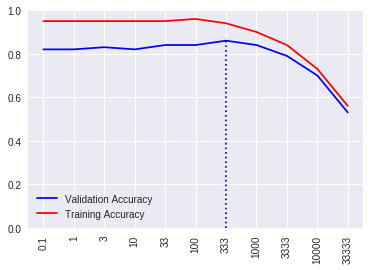

In [7]:
## Building the function to calculate training accuracy and validation accuracy for each iteration

def runOVRmodel(trials, train_data, penalty_type, penalty_score):

   val_acc = 0
   train_acc = 0
   
   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(train_data, test_size=0.3)
      ovr = OneVsRestClassifier(LogisticRegression(C=1/penalty_score, 
                                                   penalty=penalty_type))
      ovr.fit(Dtrain.iloc[:,1:785], Dtrain.iloc[:,0:1])
      y_predict_ovr = ovr.predict(mnist_test_X)
      train_acc += accuracy_score(ovr.predict(mnist_train_X), mnist_train_y)
      val_acc += accuracy_score(y_predict_ovr, mnist_test_y)
      #model_weights += np.append(ovr.intercept_, ovr.coef_)

   val_acc /= trials
   train_acc /= trials
   #model_weights /= trials

   return np.round(val_acc, decimals=2), np.round(train_acc, decimals=2) 
  
# Instantiating the required lists

alpha_vals = [.1,1,3,10,33,100,333,1000,3333,10000,33333]
val_acc = np.zeros(len(alpha_vals))
train_acc = np.zeros(len(alpha_vals))
index = 0
# Iterating the model
for l in alpha_vals:
   val_acc[index], train_acc[index] = runOVRmodel(10,mnist_train, 'l1', 
                                                  np.float(l))
   index += 1

print("Training Accuracy: {}".format(train_acc))
print("Validation Accuracy: {}".format(val_acc))

# penalty at which validation accuracy is maximum
max_index_ovr  = np.argmax(val_acc)
best_alpha = alpha_vals[max_index_ovr]
print("Best Alpha: {}".format(best_alpha))

#plot the accuracy curve
plt.plot(range(0,len(alpha_vals)), val_acc, color='b', 
         label='Validation Accuracy')
plt.plot(range(0,len(alpha_vals)), train_acc, color='r', 
         label='Training Accuracy')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical')

#Highlight the best values of alpha
plt.plot((max_index_ovr, max_index_ovr), (0, val_acc[max_index_ovr]), 
         ls='dotted', color='b')


#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

**Explanation**:

We can see from the above graph that we can find the best fitting model at Alpha of 333.

**Region of Overfit:**
we get overfit models for alpha value ranging between 0.1 and 100, because we have very high training accuracy but comparatively low validation accuracy for these values.


**Region of Underfit:**
we get overfit models for alpha value ranging between 3333 and 33333, because we have low training and validation accuracy for these values.

2.2(2)- For this section, I have evaluated the prediction performance on test data and reported the following:


*   Total number of non-zero features in the final model.
*   The confusion matrix
*   Precision, recall and accuracy for each class.


Finally, I have discussed if there is any sign of underfitting or overfitting with appropriate reasoning

In [8]:
#Building a new linear regression model based on best alpha

ovr_alpha = OneVsRestClassifier(LogisticRegression(C= 1/best_alpha, 
                                                   penalty='l1'))
ovr_alpha_model = ovr_alpha.fit(mnist_train_X,mnist_train_y)

y_pred_ovr_best = ovr_alpha_model.predict(mnist_test_X)

#Creating a weight matrix

feature_weights_ovr=ovr_alpha_model.coef_[0]
Weight_matrix_ovr = pd.DataFrame()
Weight_matrix_ovr['Feature'] = pd.Series(list(mnist_features.columns.values))
Weight_matrix_ovr['Weights'] = pd.Series(feature_weights_ovr,name= "Weights")
Weight_matrix_ovr['Abs Weights'] = abs(Weight_matrix_ovr['Weights'])

#Masking non-zero features in the weight matrix
mask = Weight_matrix_ovr[Weight_matrix_ovr.drop('Feature', axis=1) != 0]
shape_of_matrix = mask.loc[mask.dropna(thresh=1).index].shape

#Identifying the number of non-zero features 
print(f"The number of non-zero features in the matrix is:{shape_of_matrix[0]}")

#Confusion Metrices

model_cm_ovr_l1 = confusion_matrix(y_pred_ovr_best, 
                                   mnist_test_y.values.ravel())
print(f"Confusion Matrix for model with best alpha is: \n {model_cm_ovr_l1} \n")

#Performance Measures
      
accuracy = np.diag(model_cm_ovr_l1)/np.sum(model_cm_ovr_l1, axis = 1)

precision, recall, fscore, support = score(mnist_test_y.values.ravel(),
                                           y_pred_ovr_best)

Performance_matrix_per_class = pd.DataFrame()
Performance_matrix_per_class['class'] = np.array(list(range(0,10)))
Performance_matrix_per_class['accuracy'] = pd.Series(accuracy)
Performance_matrix_per_class['precision'] = pd.Series(precision)
Performance_matrix_per_class['recall'] = pd.Series(recall)
Performance_matrix_per_class['fscore'] = pd.Series(fscore)
Performance_matrix_per_class['support'] = pd.Series(support)

print(Performance_matrix_per_class)

Performance_comparison = pd.DataFrame()
Performance_comparison['class'] = np.array(list(range(0,10)))
Performance_comparison['validation accuracy'] = pd.Series(accuracy_per_class)
Performance_comparison['testing accuracy'] = pd.Series(accuracy)

print(Performance_comparison)
print(f"Average validation accuracy is {np.average(accuracy_per_class)}")
print(f"Average testing accuracy is {np.average(accuracy)}")

The number of non-zero features in the matrix is:86
Confusion Matrix for model with best alpha is: 
 [[79  0  0  0  1  1  1  0  1  1]
 [ 0 94  3  1  1  2  0  0  3  0]
 [ 1  0 55  2  0  0  0  2  1  0]
 [ 1  0  2 61  1  4  0  0  2  3]
 [ 0  0  1  0 69  1  0  1  1  1]
 [ 0  0  0  7  1 47  2  0  1  2]
 [ 0  0  6  1  2  1 66  0  1  0]
 [ 0  0  1  1  1  0  0 69  1  4]
 [ 3  0  3  1  0  8  1  0 63  1]
 [ 0  0  2  1  2  0  0  3  3 54]] 

   class  accuracy  precision    recall    fscore  support
0      0  0.940476   0.940476  0.940476  0.940476       84
1      1  0.903846   0.903846  1.000000  0.949495       94
2      2  0.901639   0.901639  0.753425  0.820896       73
3      3  0.824324   0.824324  0.813333  0.818792       75
4      4  0.932432   0.932432  0.884615  0.907895       78
5      5  0.783333   0.783333  0.734375  0.758065       64
6      6  0.857143   0.857143  0.942857  0.897959       70
7      7  0.896104   0.896104  0.920000  0.907895       75
8      8  0.787500   0.787500  0.81

**Explanation**:

Based on the above result we can see that there is no such sign of overfitting or underfitting since we are getting reatively high average testing accuracy of the model compared to the validation scores. However, testing accuracy is relatively low for digit 5 and digit 8, indicating that model is not being able to accurately regonize these two digits.  